# Various simulations related to the signature and the randomized signature with sigmoid additions

### Mechanism for Brownian Motion

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [7]:
from timeit import default_timer as timer

In [8]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [9]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

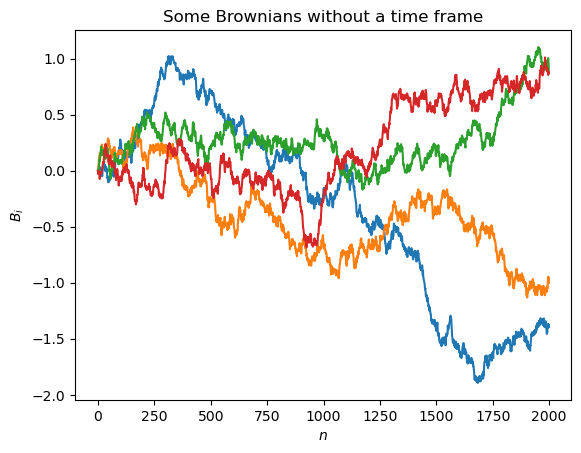

In [10]:
b = Brownian()
for i in range(4):
    plt.plot(1*b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

#### Function for scaling constant

In [11]:
def scaling(d, M):
    r = 1
    for i in range(d):
        r += M ** (i+1)
    return r

In [12]:
print(scaling(10, 4))

1398101


### Mechanism for random matrices and vectors

In [13]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))

In [14]:
A, v

(array([[[-0.94394156,  0.8626164 , -0.10216063,  1.31155367],
         [-0.20417589,  0.91479364,  1.18038797, -1.15156214]],
 
        [[ 0.12864683, -0.25449624,  0.24810487,  0.52498829],
         [ 0.82862363,  0.07626679, -0.09227088, -1.21511132]],
 
        [[-0.85341293, -1.17321144,  1.6514198 , -0.16274715],
         [-0.37589593, -0.56135803, -1.80206475, -0.71030805]]]),
 array([-0.76112393,  1.72646229,  0.68924939]))

### Time&step structure

In [15]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

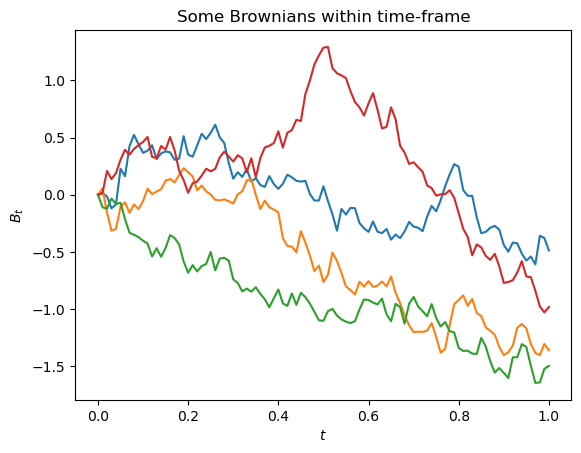

In [16]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(N))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

### Time&step structure

In [17]:
N = 10001
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

### Constructing the process

In [18]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N+1)
db =  np.diff(brow)

In [19]:
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]

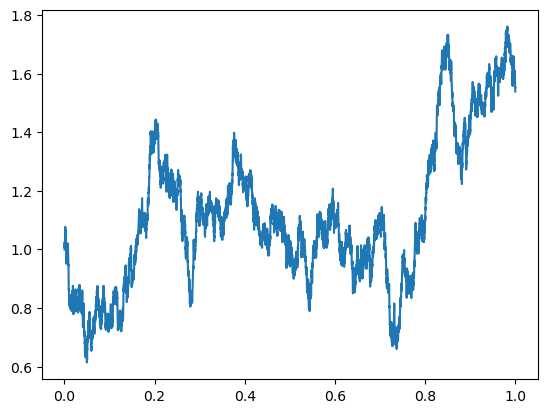

In [20]:
plt.plot(x_axis, Y)
#plt.title("Double Well process")
#plt.xlabel("$t$")
#plt.ylabel("$Y_t$")
#plt.show()

### Constructing the randomized signature

In [16]:
k = 100
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1

##### Without decay

In [17]:
for i in range(N-1):
    Z[i+1] =   Z[i] + (A@Z[i] + b)*dY[i] 

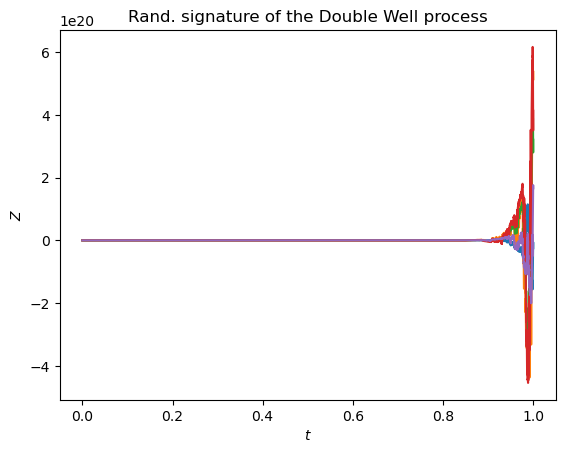

In [18]:
for i in range(5):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. signature of the Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

##### Introducing the decay constant $\lambda$, $0<\lambda<min\{1, \frac{1}{\sum_{j=0}^p M^j}\}$ 

##### In this case $M < 2$, so we could choose $\lambda := \frac{1}{1 + 2} = \frac{1}{3}$

In [62]:
lambda_1d = 1/10 # try squaring

In [63]:
for i in range(N-1):
    Z[i+1] =   Z[i] + (lambda_1d * A@Z[i] + b)*dY[i] 

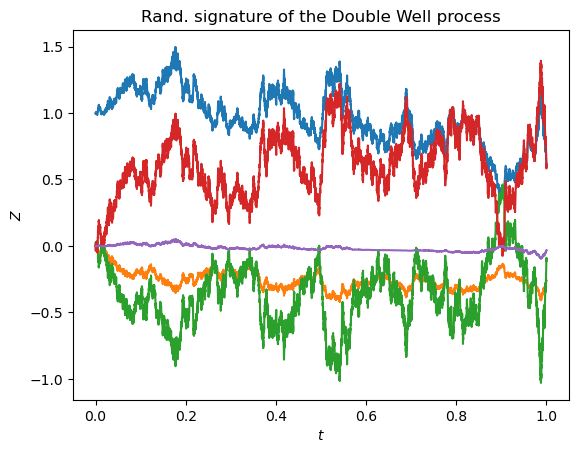

In [64]:
for i in range(5):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. signature of the Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

In [22]:
Z.shape

(10001, 100)

##### However, we do not have any polynomials in this model
##### Therefore the formula might change to $\lambda$, $0<\lambda<min\{1, \frac{1}{1 + d \cdot M}\}$ 

##### In this case $M < 2$, so we could choose $\lambda := \frac{1}{1 + 1 \cdot 2} = \frac{1}{3}$

In [23]:
lambda_1d = 1/3

In [24]:
for i in range(N-1):
    Z[i+1] =   Z[i] + (lambda_1d * A@Z[i] + b)*dY[i] 

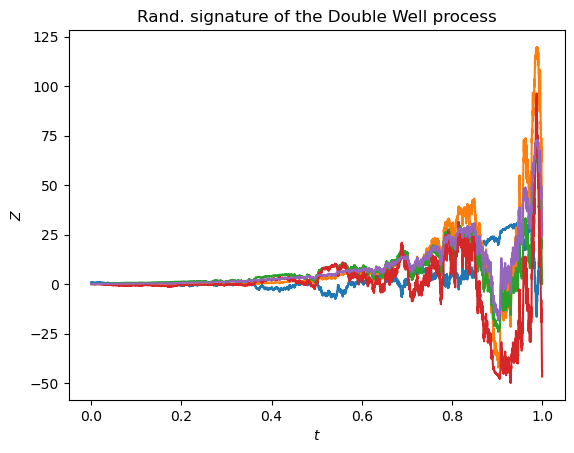

In [25]:
for i in range(5):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. signature of the Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

In [25]:
Z.shape

(10001, 100)

##### Another method, try sampling the A's and B's better

##### $A_i \sim \mathcal{N}(0, \frac{\Delta_t}{4k\tilde{M}^2}), b \sim \mathcal{N}(0, \frac{1}{k})$

In [98]:
k = 100
# delta is confidence?
# 2/13
A_new = np.random.normal(0, step, size=(k, k))
b_new = np.random.normal(0, 1/k, size=k)
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1

In [99]:
for i in range(N-1):
    Z[i+1] =   Z[i] + (A_new@Z[i] + b_new)*dY[i] 

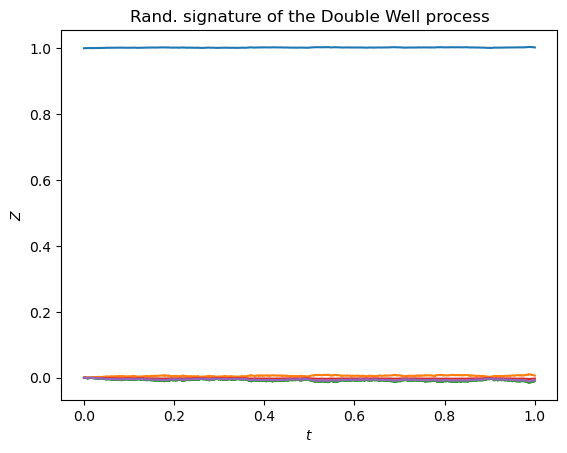

In [100]:
for i in range(5):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. signature of the Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

### Training the linear, time-homogeneous readout - without regularization

In [26]:
model1 = LinearRegression().fit(Z, Y)

In [27]:
r_sq_1 = model1.score(Z, Y)
print(f"coefficient of determination: {r_sq_1}")

coefficient of determination: 1.0


In [28]:
print(f"intercept: {model1.intercept_}")

intercept: 0.9910921416821914


In [29]:
print(f"coefficients: {model1.coef_}")

coefficients: [ 8.90785832e-03 -2.77286640e-03 -7.99142415e-03 -1.45917227e-02
  1.72935493e-02  1.91399581e-02  1.70897511e-02 -9.45419361e-03
 -2.63716859e-02  1.20393676e-02  4.11518567e-03  4.74682466e-03
 -2.54363320e-02 -2.09622090e-03 -1.13780540e-02  1.13251037e-02
  3.55763272e-03  1.10989762e-02 -3.91748398e-03  1.22478258e-02
 -2.93029312e-03  2.40155186e-02  8.98190180e-03 -1.04851768e-02
  9.41655995e-03  3.96464023e-04 -7.36562589e-03 -1.41101320e-02
 -7.68291479e-03  1.04665201e-02 -8.08354060e-03 -2.33714805e-02
  1.75253591e-03  2.22316678e-02  1.02107690e-02 -3.58068657e-03
 -3.27810632e-02  9.64457205e-03  1.25390723e-02  5.98887649e-03
 -1.12645419e-02  2.17419916e-02 -1.63709547e-02 -1.12131526e-02
  6.07231490e-03 -1.95559819e-03 -1.11067337e-02 -4.82401580e-03
 -9.81620276e-03 -2.32832636e-02 -1.45640963e-02  1.98960604e-03
 -9.65798956e-04 -5.45607233e-03 -5.42583532e-03 -1.62914013e-03
  4.46524005e-03 -9.87791220e-03  1.73270578e-02  5.68636895e-03
 -2.1780626

In [30]:
Y_pred_1 = model1.predict(Z)

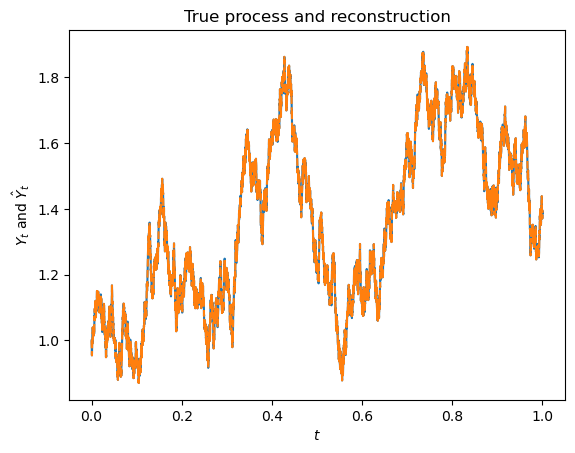

In [31]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_1, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

In [151]:
k

100

### Simulating n_sim times and testing out of sample with Gaussians

In [32]:
n_sim = 10
k = 50
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
Y_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))
Y_big[0:N,] = np.ones(N)
Z_big[0:N,].shape

(10001, 50)

In [33]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + (lambda_1d * A@Z[i] + b)*dY[i]
    Y_big[iter*N:(iter+1)*N] = Y
    Z_big[iter*N:(iter+1)*N,:] = Z

In [34]:
model3 = Ridge(alpha=1.0)
model3.fit(Z_big, Y_big)

Ridge()

In [35]:
r_sq_3 = model3.score(Z_big, Y_big)
print(f"coefficient of determination: {r_sq_3}")

coefficient of determination: 0.9999999900174295


In [36]:
print(f"intercept: {model3.intercept_}")

intercept: 0.9807547419233108


In [37]:
print(f"coefficients: {model3.coef_}")

coefficients: [ 0.01930304 -0.01934653 -0.00086433  0.01961442 -0.00279024 -0.00729863
 -0.01725476 -0.0309533  -0.01178982 -0.00304774  0.04026654 -0.04330545
 -0.0221676   0.02059565  0.00848625  0.00743055 -0.01265791  0.00742499
 -0.01535565  0.01729159  0.03041978 -0.03153074 -0.00302623  0.01089893
 -0.00718802  0.0182219  -0.01070359  0.00498135 -0.03336882 -0.00751195
 -0.01362622  0.01375323  0.04126881 -0.02631103 -0.02139997 -0.00939468
 -0.00942215 -0.03377162 -0.03913741 -0.03161203  0.01370539 -0.02963766
  0.05446844 -0.01623134  0.01851797 -0.00933131  0.03252052  0.00638726
 -0.0459603   0.00395774]


In [38]:
br = Brownian()
Y = np.zeros(N)
Y[0] = y0
brow = br.gen_normal(N+1)
db =  np.diff(brow)
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1
for i in range(N-1):
    Z[i+1] = Z[i] + (lambda_1d * A@Z[i] + b)*dY[i]

In [39]:
Y_pred_3 = model3.predict(Z)

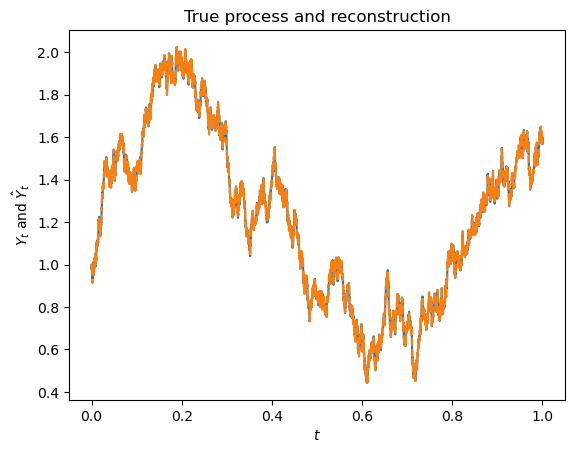

In [40]:
#Y_big[0:N]
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_3, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

In [41]:
np.linalg.norm(Y-Y_pred_3)

0.006741434017207245

In [ ]:
# it was 0.010797916446842453 before

### Simulating n_sim times and testing out of sample with Bernoullis

In [ ]:
n = 1
p = 0.5

In [ ]:
n_sim = 1000
k = 15
A = np.random.binomial(n, p, size=(k,k))*2 - 1
b = np.random.binomial(n, p, size=k)*2 - 1
Y_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))
Y_big[0:N,] = np.ones(N)
A

In [ ]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]
    Y_big[iter*N:(iter+1)*N] = Y
    Z_big[iter*N:(iter+1)*N,:] = Z

In [ ]:
model4 = Ridge(alpha=.01)
model4.fit(Z_big, Y_big)

In [ ]:
r_sq_4 = model4.score(Z_big, Y_big)
print(f"coefficient of determination: {r_sq_4}")

In [ ]:
print(f"intercept: {model4.intercept_}")

In [ ]:
print(f"coefficients: {model4.coef_}")

In [ ]:
br = Brownian()
Y = np.zeros(N)
Y[0] = y0
brow = br.gen_normal(N+1)
db =  np.diff(brow)
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1
for i in range(N-1):
    Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]

In [ ]:
Y_pred_4 = model4.predict(Z)

In [ ]:
#Y_big[0:N]
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_4, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

In [ ]:
np.linalg.norm(Y-Y_pred_4)

## 4-Dimensional Ornstein–Uhlenbeck process

### Time&step structure

In [24]:
N = 10001
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

### Constructing the process

In [25]:
y0_4, mu_4 = np.array([1,1,1,1]), np.array([1,1,1,1])
sigma_4 = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
theta_4 = np.array([[1,1/2,1/3,1/4], [2,1,2/3,2/4], [3,3/2,1,3/4], [4,2,4/3,1]])
Y_4 = np.zeros((N,4))
Y_4[0] = y0_4
brow_4 = np.zeros((N+1,4))
#sigma_4 = theta_4

In [26]:
b_4 = Brownian()

for i in range(4):
    brow_4[:,i] = b_4.gen_normal(N+1)
db_4 = np.diff(brow_4, axis = 0)

In [27]:
for i in range(N-1):
    Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

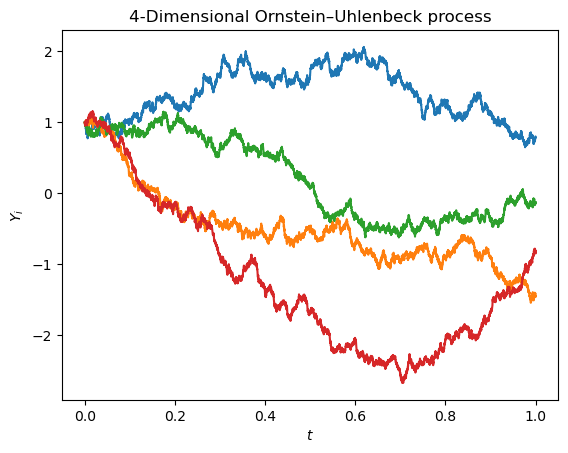

In [28]:
for i in range(4):
    plt.plot(x_axis, Y_4[:,i])

plt.title("4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature

In [29]:
k_4 = 100
A_4 = np.random.normal(0, 1, size=(4, k_4, k_4))
b_4 = np.random.normal(0, 1, size=(4,k_4))
dY_4 = np.diff(Y_4, axis = 0)
Z_4 = np.zeros((N, k_4))
Z_4[0][0] = 1

In [30]:
dY_4.shape

(10000, 4)

##### Without decay

In [31]:
for i in range(N-1):
    for j in range(4):
        Z_4[i+1] = Z_4[i] + (A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]

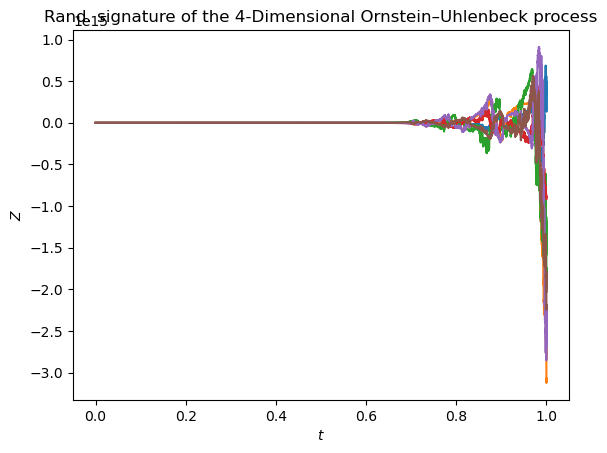

In [32]:
for i in range(6):
    plt.plot(x_axis, Z_4[:,i])

plt.title("Rand. signature of the 4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

##### Introducing the decay constant $\lambda$, $0<\lambda<min\{1, \frac{1}{\sum_{j=0}^p M^j}\}$ 

##### In this case $M < 2$, so we could choose $\lambda := \frac{1}{1 + 2^1 + 2^2 + 2^3 + 2^4} = \frac{1}{31}$

In [33]:
lambda_4d = 1 / 31

In [34]:
for i in range(N-1):
    for j in range(4):
        Z_4[i+1] = Z_4[i] + (lambda_4d * A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]

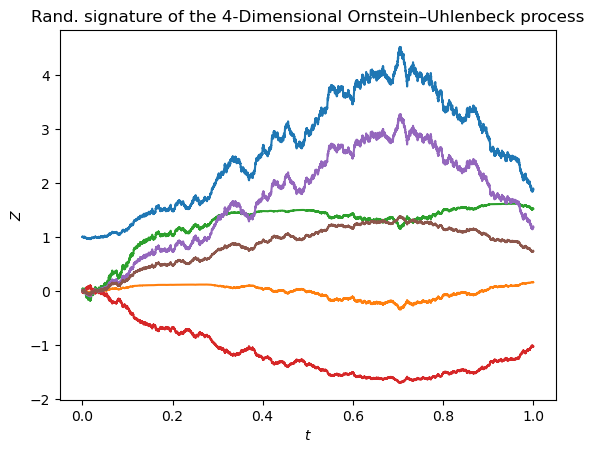

In [35]:
for i in range(6):
    plt.plot(x_axis, Z_4[:,i])

plt.title("Rand. signature of the 4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

##### However, we do not have any polynomials in this model
##### Therefore the formula might change to $\lambda$, $0<\lambda<min\{1, \frac{1}{1 + d \cdot M}\}$ 

##### In this case $M < 2$, so we could choose $\lambda := \frac{1}{1 + 4 \cdot 2} = \frac{1}{9}$

In [281]:
lambda_4d = 1 / 9

In [282]:
for i in range(N-1):
    for j in range(4):
        Z_4[i+1] = Z_4[i] + (lambda_4d * A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]

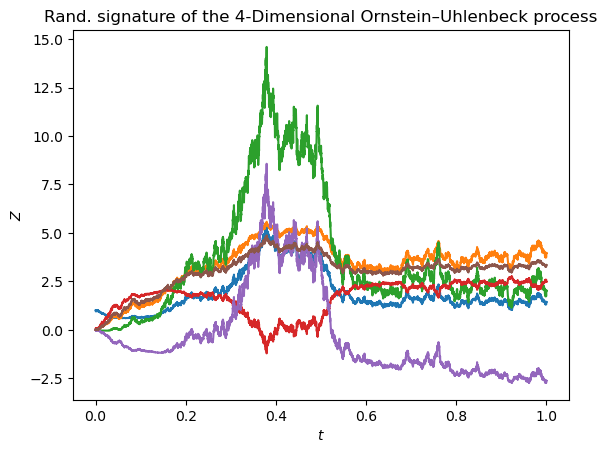

In [283]:
for i in range(6):
    plt.plot(x_axis, Z_4[:,i])

plt.title("Rand. signature of the 4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

## 10-Dimensional Made-Up process

In [303]:
y0_10, mu_10 = np.ones(10), np.ones(10)
sigma_10 = np.eye(10)
theta_10 = np.zeros((10, 10))

for i in range(10):
    for j in range(10):
        theta_10[i][j] = (i+1)/(j+1)

In [304]:
Y_10 = np.zeros((N,10))
Y_10[0] = y0_10
brow_10 = np.zeros((N+1,10))

In [305]:
b_10 = Brownian()

for i in range(10):
    brow_10[:,i] = b_10.gen_normal(N+1)
db_10 = np.diff(brow_10, axis = 0)

In [306]:
for i in range(N-1):
    Y_10[i+1] = Y_10[i] + (mu_10 - theta_10 @ Y_10[i]) * step + sigma_10 @ db_10[i]

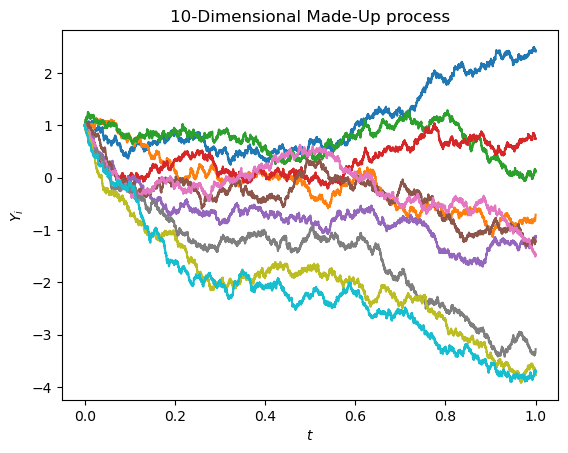

In [307]:
for i in range(10):
    plt.plot(x_axis, Y_10[:,i])

plt.title("10-Dimensional Made-Up process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature - 10-Dimensional Made-Up process

In [313]:
k_10 = 10
A_10 = np.random.normal(0, 1, size=(10, k_10, k_10))
b_10 = np.random.normal(0, 1, size=(10, k_10))
dY_10 = np.diff(Y_10, axis = 0)
Z_10 = np.zeros((N, k_10))
Z_10[0][0] = 1

In [314]:
dY_10.shape

(10000, 10)

In [331]:
lambda_d10 = 1 / scaling(10, 4)

In [329]:
for i in range(N-1):
    for j in range(10):
        Z_10[i+1] = Z_10[i] + (lambda_d10 * A_10[j]@Z_10[i] + b_10[j])*dY_10[i][j]

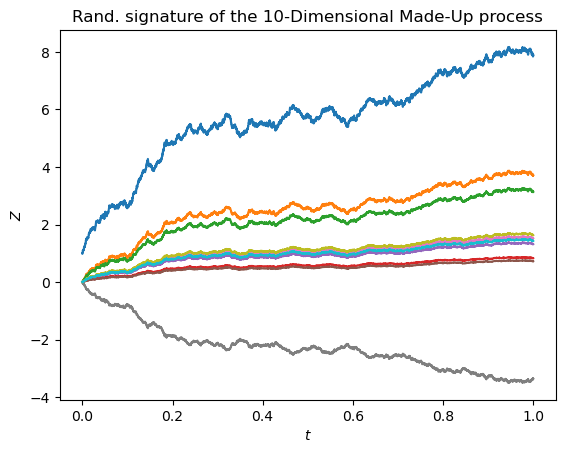

In [330]:
for i in range(10):
    plt.plot(x_axis, Z_10[:,i])

plt.title("Rand. signature of the 10-Dimensional Made-Up process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

### $Nsim$-Dimensional generalized Ornstein–Uhlenbeck process

In [335]:
Nsim = 50 #free to choose dimensionality of the generalized process

In [336]:
y0_Nsim, mu_Nsim = np.ones(Nsim), np.ones(Nsim)
sigma_Nsim = np.eye(Nsim)
theta_Nsim = np.zeros((Nsim, Nsim))

for i in range(Nsim):
    for j in range(Nsim):
        theta_Nsim[i][j] = (i+1)/(j+1)

In [337]:
Y_Nsim = np.zeros((N,Nsim))
Y_Nsim[0] = y0_Nsim
brow_Nsim = np.zeros((N+1,Nsim))

In [338]:
b_Nsim = Brownian()

for i in range(Nsim):
    brow_Nsim[:,i] = b_Nsim.gen_normal(N+1)
db_Nsim = np.diff(brow_Nsim, axis = 0)

In [339]:
for i in range(N-1):
    Y_Nsim[i+1] = Y_Nsim[i] + (mu_Nsim - theta_Nsim @ Y_Nsim[i]) * step + sigma_Nsim @ db_Nsim[i]

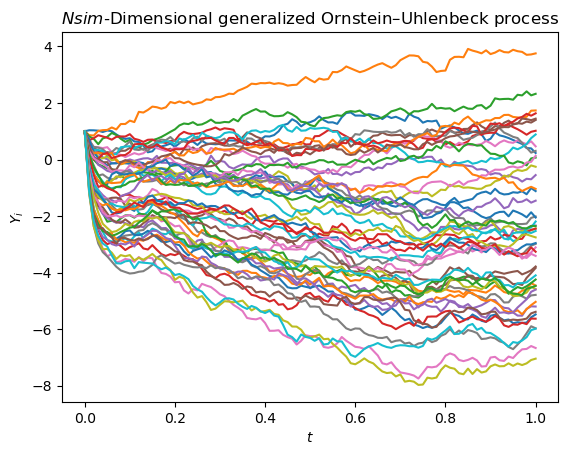

In [340]:
for i in range(Nsim):
    plt.plot(x_axis, Y_Nsim[:,i])

plt.title("$Nsim$-Dimensional generalized Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature - $Nsim$-Dimensional generalized Ornstein–Uhlenbeck process

In [341]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

In [342]:
k_Nsim = 1000 #free to choose dimensionality of the rand. signature

In [343]:
A_Nsim = np.random.normal(0, 1, size=(Nsim, k_Nsim, k_Nsim))
b_Nsim = np.random.normal(0, 1, size=(Nsim, k_Nsim))
dY_Nsim = np.diff(Y_Nsim, axis = 0)
Z_Nsim = np.zeros((N, k_Nsim))
Z_Nsim[0][0] = 1

In [344]:
dY_Nsim.shape

(100, 50)

In [345]:
lambda_dNsim = 1 / scaling(10, 4)

In [346]:
start = timer()
for i in range(N-1):
    for j in range(Nsim):
        Z_Nsim[i+1] = Z_Nsim[i] + (lambda_dNsim * A_Nsim[j]@Z_Nsim[i] + b_Nsim[j])*dY_Nsim[i][j]
end = timer()
print(end - start)

24.05628119999892


In [347]:
print(N)

101


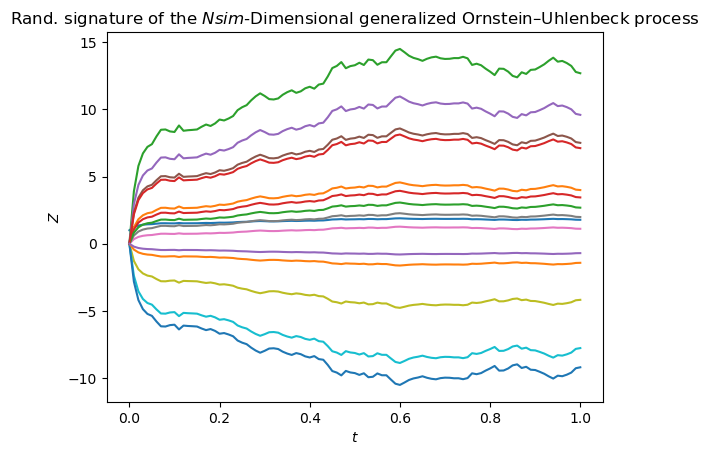

In [348]:
for i in range(15):
    plt.plot(x_axis, Z_Nsim[:,i])

plt.title("Rand. signature of the $Nsim$-Dimensional generalized Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()